# Interpreting Visition Transformer With TAM Interpreters

In [1]:
import paddle
import interpretdl as it

In [2]:
# load vit model and weights
!wget -c https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ViT_base_patch16_224_pretrained.pdparams -P assets/

from assets.vision_transformer import ViT_base_patch16_224
paddle_model = ViT_base_patch16_224()
MODEL_PATH = 'assets/ViT_base_patch16_224_pretrained.pdparams'
paddle_model.set_dict(paddle.load(MODEL_PATH))

--2021-10-12 16:46:27--  https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ViT_base_patch16_224_pretrained.pdparams
正在解析主机 paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)... 2409:8c04:1001:1002:0:ff:b001:368a, 111.206.210.93, 111.206.210.81
正在连接 paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)|2409:8c04:1001:1002:0:ff:b001:368a|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 416 Requested Range Not Satisfiable

    文件已下载完成；不会进行任何操作。



/Users/yuantingyi/opt/anaconda3/envs/paddle2/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


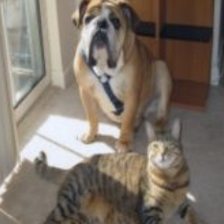

In [3]:
from PIL import Image
from interpretdl.data_processor.readers import read_image

img_path = 'assets/catdog.png'
x = Image.fromarray(read_image(img_path)[0])
x

In [4]:
tam = it.TAMInterpreter(paddle_model, use_cuda=False)

/Users/yuantingyi/opt/anaconda3/envs/paddle2/lib/python3.7/site-packages/paddle/fluid/dygraph/varbase_patch_methods.py:379: UserWarning: 
tensor.grad will return the tensor value of the gradient. 
  warnings.warn(warning_msg)


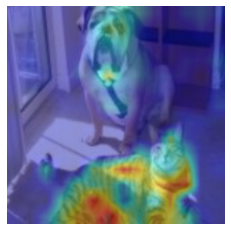

In [5]:
heatmap = tam.interpret(
        img_path,
        start_layer=4,
        label=None,
        visual=True,
        save_path=None)

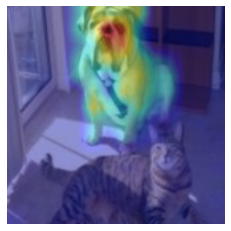

In [8]:
heatmap = tam.interpret(
        img_path,
        start_layer=4,
        label=243,
        visual=True,
        save_path=None)

In [7]:
# new interpretation algorithms will be implemented soon.